<a href="https://colab.research.google.com/github/yaswanthsaimogili/MachinelearningProject/blob/master/mlcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title :      Marketing Campaign for Banking Products**

**Description :**The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign

**Objective:**
The classification goal is to predict the likelihood of a liability customer buying personal
loans

**Step 1 :  Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc**

**1.1  Importing required python libraries and machine learning libraries**


In [3]:
#including libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**1.2 Reading dataset and  understanding data with basic operations on dataset**


In [4]:
data=pd.read_csv("/content/data.csv") # loading dataset
data.head() # display first five rows in dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**observation:** In above step we included our dataset by diaplaying our data we observed that they ar total 12 feature variables for prediction wheather person get loan or not that are age,experience,income,zip code,ccavg ,mortgage, securities account, cd account,online,credit card by using this we have to predict wheather a person can get personal loan or not.

In [5]:
data.tail() # prints last 5 rows in dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
data.info() # it provides basic info about dataset like dtype ,columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**observation:**In this step we observerd total no of rows and datatypes of each column int(13) and float(1)and finally from this data we conclude that our data does not contain null values so we need not to do any null value replacing process

In [7]:
data.describe() # it produces the basic statistical opeartion values / statistical summary  on dataset for each cloumn

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**observation :** In this step we observed different statical measures values of our data by considering above data **experience** column has negative min value so this coumn contain some false/negative data se we have to process it.

In [8]:
data.isnull().any() # checking wheather column contains null value

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

**observation:**we check our data contains null values or not . so we say our data doesnot contain null values.  

In [9]:
data.shape # dimenssions of datset

(5000, 14)

In [10]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

**observations:**by considering above columns we divided columns into different categories

**Nominal Data**

1.ID: Customer ID

2.ZIP Code: Home Address ZIP code.

**Interval Data**

 1.Age: Customer's age in completed years

 2.Experience: #years of professional experience

 3.Income: Annual income of the customer 

 4.CCAvg: Avg. spending on credit cards per month 

 5.Mortgage: Value of house mortgage if any. 

 **Binary category**

1.Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

2.Securities Account: Does the customer have a securities account with the bank?

3.CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

4.Online: Does the customer use internet banking facilities?

5.Credit card: Does the customer use a credit card issued by the bank?

**ordinal category data**

1.Family: Family size of the customer

2.Education: Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional
 




**step 2.cleaning the data:**



In [11]:
data[data[['Experience']]<0]=data['Experience'].median() #cchanging negative values with median

**observation :**since in prev step we observed the experience column conatin negative values so replace with mean

In [12]:
data.describe()# describe function

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
dup=data.duplicated() # checking wheather data contains duplicate values
print(dup.any())

False


**observation :**this datset does not contain any duplicate values

In [14]:
data.corr() # correlation between each column

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


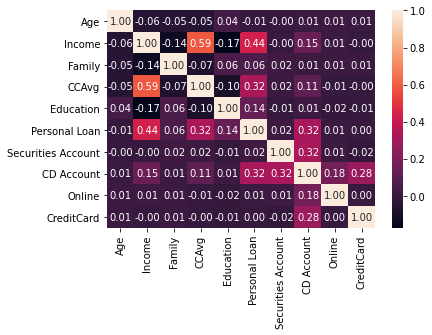

In [59]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')

**observation:**by considering above correlation table we can say that age and experience columns are highly correlated which is more than(> 0.9). so we can remove experience coulmn . it will not effect our model.

In [16]:
data.drop(['ID','Experience'],axis=1,inplace=True) # removing unnecessary columns in dataset

**observation :**from above statement we consider to remove **Experience** column and **ID** column because values in id column are not related data.

In [17]:
data

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


observation: data after dropped id and experience column.

**Step 3: Exploratory data anlysis**
 
 EDA: Study the data distribution in each attribute and target variable, share your
findings.

● Number of unique in each column?

● Number of people with zero mortgage?

● Number of people with zero credit card spending per month?

● Value counts of all categorical columns.

● Univariate and Bivariate analysis

**3.1 Number of unique in each column?**

In [18]:
data.nunique() # number unique values in each column

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [19]:
data.drop(['ZIP Code'],axis=1,inplace=True)

In [20]:
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


**observation :** Zip code manu unique values so data can be varied into different small data by zipcode so we dropped zipcode

**3.2 Number of people with zero mortgage?**

In [21]:
(data['Mortgage']==0).sum() # no of people with zero mortgage

3462

**observation :** there are 3462 zero values in mortgage column i.e 48%

**3.3 Number of people with zero credit card spending per month?**

In [22]:
 (data['CCAvg']==0).sum()# no of people with zero credit card spending per month

106

**observation:** there are 106 zero values

**3.4  Value counts of all categorical columns.**

In [23]:
print("Education counts :") # Value counts of Education column
data['Education'].value_counts()


Education counts :


1    2096
3    1501
2    1403
Name: Education, dtype: int64

**observation:** here education of coustmers are categorized into  three categories level 1:42% ,level 2: 30% ,level 3:28% people from this percentages we consider that people with level 1 are high to apply loan

In [24]:
print("Family counts :")   # Value counts of Family column
data['Family'].value_counts()


Family counts :


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

**observation:** here family of coustmers are categorized into  four categories level 1:30% ,level 2: 26% ,level 3:24% 4:20 people from this percentages we consider that people with level 1 are high to apply loan

**3.4 Univariate and Bivariate analysis**

**3.4.1 Univariate Analysis**

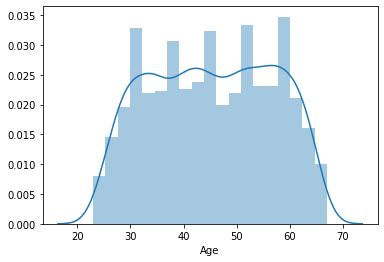

In [25]:
sns.distplot(data.Age)

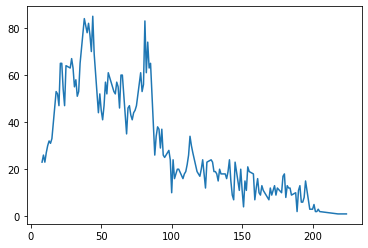

In [26]:
data['Income'].value_counts().sort_index().plot.line()

**observation :** the univariate analysis of income we observed that graph contains  right skewness since it not good for our model

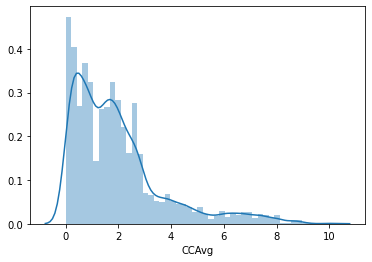

In [27]:
sns.distplot(data.CCAvg)

**observation :** the univariate analysis of CCAvg we observed that graph contains  right skewness since it not good for our model

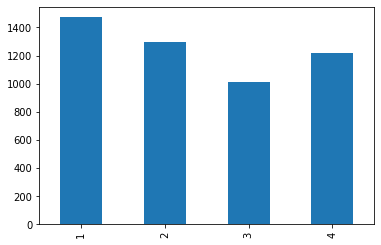

In [28]:
data['Family'].value_counts().sort_index().plot.bar()

**observation :** the univariate analysis of family we observed that family with one member have applied more loans

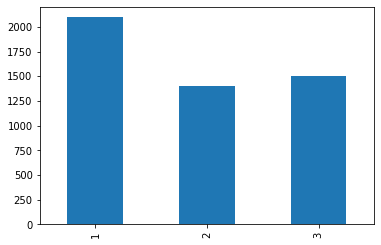

In [29]:
data['Education'].value_counts().sort_index().plot.bar()

**observation :** the univariate analysis of education we observed that people with education level 1 are more to apply a loan

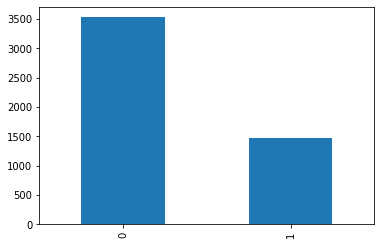

In [30]:
data['CreditCard'].value_counts().sort_index().plot.bar()

**observation :** the univariate analysis of Credit card we observed that people have less credit cards holders who applied for loan 

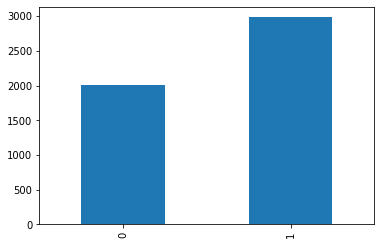

In [31]:
data['Online'].value_counts().sort_index().plot.bar()

**observation :** the univariate analysis of Online we observed that max people who applied for loan uses online banking facility

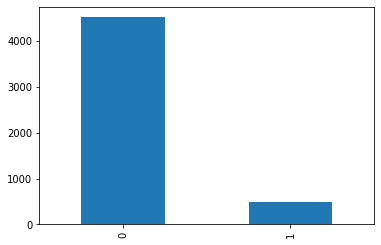

In [32]:
data['Personal Loan'].value_counts().sort_index().plot.bar()

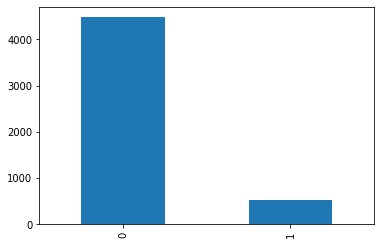

In [33]:
data['Securities Account'].value_counts().sort_index().plot.bar()

**observation :** the univariate analysis of Security account we observed that less people have seurity account

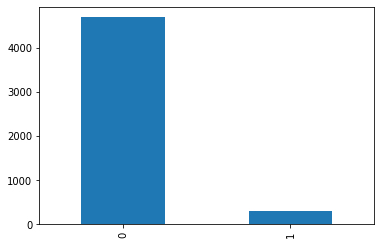

In [34]:
data['CD Account'].value_counts().sort_index().plot.bar()

**observation :** the univariate analysis of Cd account we observed that less people have Cd account

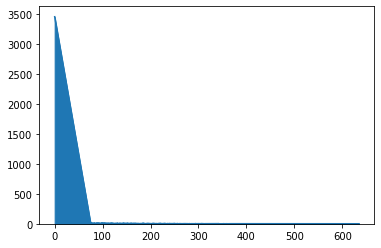

In [35]:
data['Mortgage'].value_counts().sort_index().plot.area()

**observation :** the univariate analysis of Mortgage we observed that graph conatins high skewness 

**3.4.2 BI-Variate Analysis**

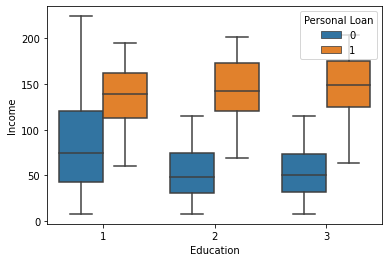

In [36]:
sns.boxplot(x='Education',y='Income',data=data,hue='Personal Loan')

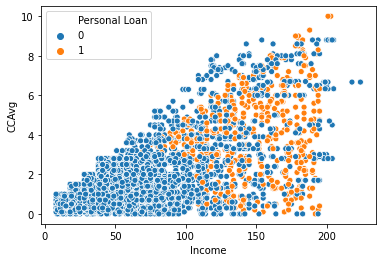

In [37]:
sns.scatterplot(x='Income',y='CCAvg',data=data,hue="Personal Loan")

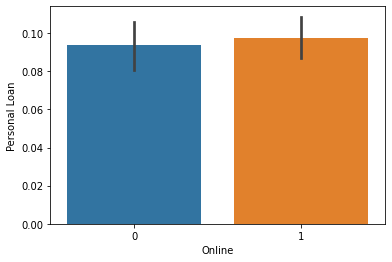

In [38]:
sns.barplot(x='Online',y='Personal Loan',data=data)

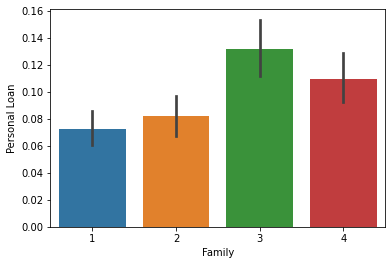

In [39]:
sns.barplot(x='Family',y='Personal Loan',data=data)

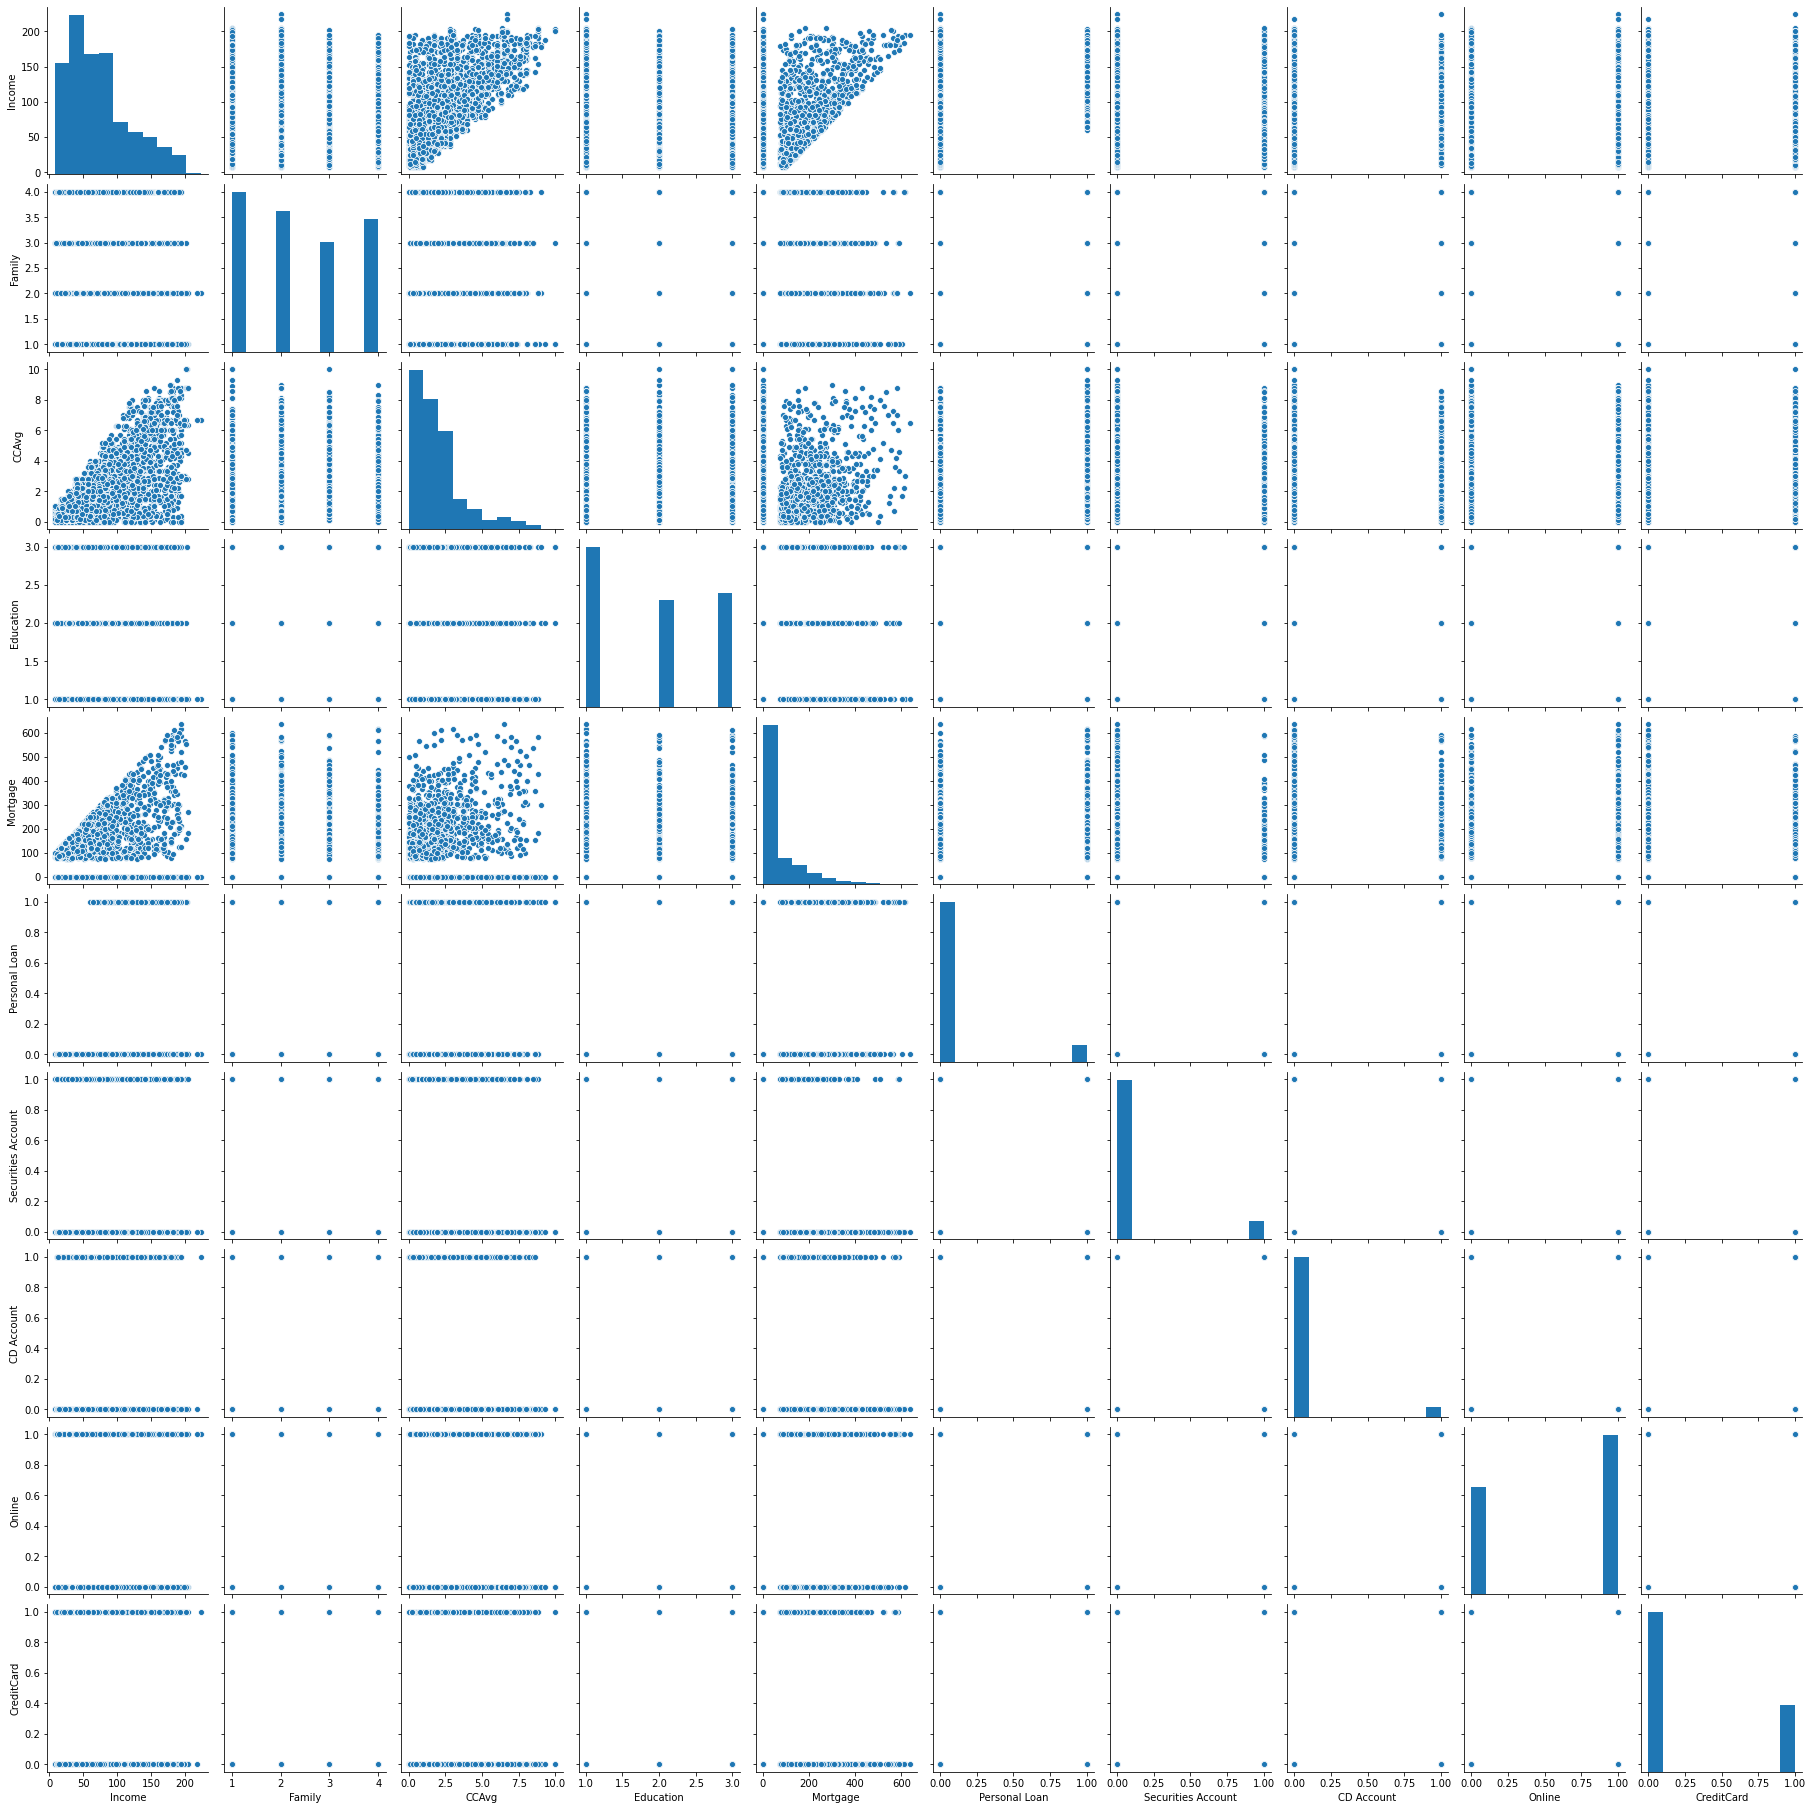

In [40]:
sns.pairplot(data.iloc[:,1:])

**Step 4:  Apply necessary transformations for the feature variables**

By observing the univariate analysis of feature variables we say that some variables are  high skewed didtribution now we apply neccessary transformations we can obtain less skwed distribution. 

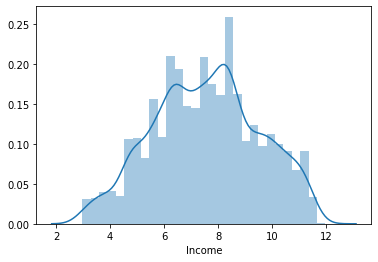

In [41]:
# since Income has high right skewness 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson',standardize=False)
data['Income'] = scaler.fit_transform(data['Income'].values.reshape(-1,1))
sns.distplot(data.Income)

**observation :** In above univariate analysis of Income we observed that graph contain high skewness so we reduced it skewness by using power tranformation technique

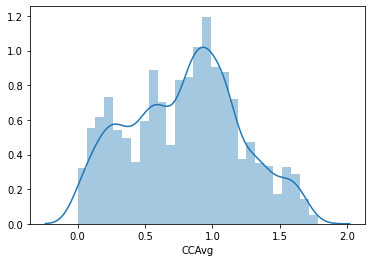

In [42]:
# since CCAvg has high right skewness 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson',standardize=False)
data['CCAvg']=scaler.fit_transform(data['CCAvg'].values.reshape(-1,1))
sns.distplot(data.CCAvg)

**observation :** In above univariate analysis of CCavg we observed that graph contain high skewness so we reduced it skewness by using power tranformation technique

In [43]:
data['Mortgage_Int']=pd.cut(data['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data.drop('Mortgage',axis=1,inplace=True)
data

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,4,0.845160,1,0,1,0,0,0,0
1,45,5.876952,3,0.814478,1,0,1,0,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,6.287699,1,0.928941,3,0,0,0,1,0,0
4996,30,4.077942,4,0.322049,1,0,0,0,1,0,0
4997,63,5.058173,2,0.253539,3,0,0,0,0,0,0
4998,65,6.827583,3,0.384645,2,0,0,0,1,0,0


**observation :** In above univariate analysis of Mortgage we observed that graph contain high skewness because it ha more zero values(>50%) so we reduced it skewness by using binning technique
and distribute the data.

**Step 5 :  Normalise your data and split the data into training and test set in the ratio of 70:30
respectively**

divide  data set into feature variable set and predict variable into variable x,y

In [44]:
y=data['Personal Loan'] # loading personal loan values into variable y
X=data.drop(['Personal Loan'],axis=1) # loading remaining data to variable x
X

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,4,0.845160,1,1,0,0,0,0
1,45,5.876952,3,0.814478,1,1,0,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,29,6.287699,1,0.928941,3,0,0,1,0,0
4996,30,4.077942,4,0.322049,1,0,0,1,0,0
4997,63,5.058173,2,0.253539,3,0,0,0,0,0
4998,65,6.827583,3,0.384645,2,0,0,1,0,0


divided data into two variables x,y and now split data into train and test data data by using train_test_split .



In [45]:
from sklearn.model_selection import train_test_split # imported required library
#split data into x_train,y_tarin,y_test,x_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify =y,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


**observation** we divided data into two sets train and test data sets

**Step 6 :Use the Logistic Regression model to predict the likelihood of a customer buying
personal loans**

In [46]:
from sklearn.linear_model import LogisticRegression #importing logistic regression module
l_r=LogisticRegression(max_iter=3500)
# training our model with train set
l_r.fit(X_train,y_train)
#predict with test data set
pred_lr=l_r.predict(X_test)
#predict with train data set
pred_lr1=l_r.predict(X_train)

**In the above code we are using logistic regression to predit our model first we are trainging model with train set and predicted with test data.**

**Step7 :Print all the metrics related for evaluating the model performance**

**In this step we analyse our regression model with different metrics**

metrics:
Accuracy Score : 0.9506666666666667
Accuracy Score of: 0.9562857142857143
Precision Score: 0.8301886792452831
f1-score: 0.7040000000000001
recall-score: 0.6111111111111112
roc_score: 0.7989183874139626
confusion matrix :
[[1338   18]
 [  56   88]]


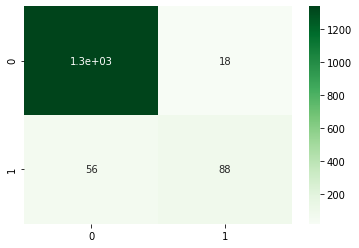

In [47]:
#importing libraries
from sklearn import metrics
print("metrics:")
print("Accuracy Score :",metrics.accuracy_score(y_test,pred_lr))
print("Accuracy Score of:",metrics.accuracy_score(y_train,pred_lr1))
#precision score
print("Precision Score:",metrics.precision_score(y_test,pred_lr))
#f1-score
print("f1-score:",metrics.f1_score(y_test,pred_lr))
#recall score
print("recall-score:",metrics.recall_score(y_test,pred_lr))
#roc score
print("roc_score:",metrics.roc_auc_score(y_test,pred_lr))
#confusion maxtrix
print("confusion matrix :")
c_m = metrics.confusion_matrix(y_test, pred_lr)
print(c_m)
sns.heatmap(c_m,annot=True,cmap='Greens')

**By analysing the different mertics we analyse the our logictistic regression model it predicted with accuracy of 94%. so now perform other algorithms to check which model better for our problem**

**Step 8: Build various other classification algorithms and compare their performance.**

**In this step we perform various algorithms to check prediction rate of our data**

**1.Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier # importing RandomForest classifier module
R_f = RandomForestClassifier(random_state=1)
# training the Random forest classifier
R_f.fit(X_train, y_train)
# predict the model with test dataset
predict_rf = R_f.predict(X_test)

Accuracy Score : 0.9826666666666667
Precision Score: 0.9609375
f1-score: 0.9044117647058825
recall-score: 0.8541666666666666
roc_score: 0.9252396755162241
confusion matrix :
[[1351    5]
 [  21  123]]


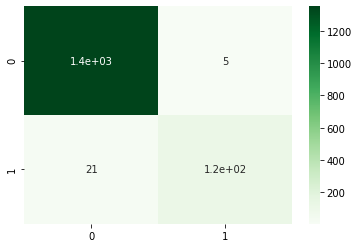

In [49]:
# Accuracy of our model
from sklearn import metrics
print("Accuracy Score :",metrics.accuracy_score(y_test,predict_rf))
#precision score
print("Precision Score:",metrics.precision_score(y_test,predict_rf))
#f1-score
print("f1-score:",metrics.f1_score(y_test,predict_rf))
#recall score
print("recall-score:",metrics.recall_score(y_test,predict_rf))
#roc score
print("roc_score:",metrics.roc_auc_score(y_test,predict_rf))
#confusion maxtrix
print("confusion matrix :")
c_m = metrics.confusion_matrix(y_test, predict_rf)
print(c_m)
sns.heatmap(c_m,annot=True,cmap='Greens')

**2. KNeighbors classifier**

In [50]:
from sklearn.neighbors import KNeighborsClassifier   # importing Kneighbors  classifier module
k_N_N=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# training the kNeighbors classifier
k_N_N.fit(X_train, y_train)
# predict the model with test dataset
predict_knn= k_N_N.predict(X_test)

Accuracy Score : 0.9526666666666667
Precision Score: 0.9294117647058824
f1-score: 0.6899563318777293
recall-score: 0.5486111111111112
roc_score: 0.7720931661750245
confusion matrix :
[[1350    6]
 [  65   79]]


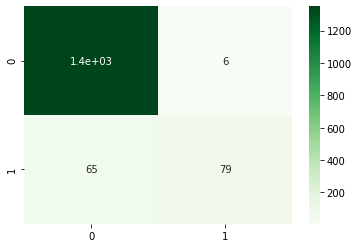

In [51]:
# Accuracy of our model
from sklearn import metrics
print("Accuracy Score :",metrics.accuracy_score(y_test,predict_knn))
#precision score
print("Precision Score:",metrics.precision_score(y_test,predict_knn))
#f1-score
print("f1-score:",metrics.f1_score(y_test,predict_knn))
#recall score
print("recall-score:",metrics.recall_score(y_test,predict_knn))
#roc score
print("roc_score:",metrics.roc_auc_score(y_test,predict_knn))
#confusion maxtrix
print("confusion matrix :")
c_m = metrics.confusion_matrix(y_test, predict_knn)
print(c_m)
sns.heatmap(c_m,annot=True,cmap='Greens')

**3.DecisionTree classifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
D_t = DecisionTreeClassifier()
# Training Decision Tree Classifer
D_t= D_t.fit(X_train,y_train)
#Predict the response for test dataset
predict_dt = D_t.predict(X_test)

Accuracy Score : 0.9786666666666667
Precision Score: 0.9057971014492754
f1-score: 0.8865248226950354
recall-score: 0.8680555555555556
roc_score: 0.9292342674532941
confusion matrix :
[[1343   13]
 [  19  125]]


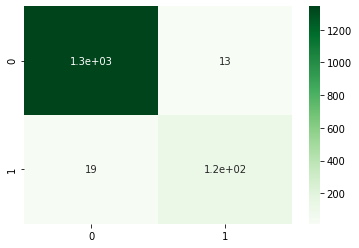

In [53]:
# Accuracy of our model
from sklearn import metrics
print("Accuracy Score :",metrics.accuracy_score(y_test,predict_dt))
#precision score
print("Precision Score:",metrics.precision_score(y_test,predict_dt))
#f1-score
print("f1-score:",metrics.f1_score(y_test,predict_dt))
#recall score
print("recall-score:",metrics.recall_score(y_test,predict_dt))
#roc score
print("roc_score:",metrics.roc_auc_score(y_test,predict_dt))
#confusion maxtrix
print("confusion matrix :")
c_m = metrics.confusion_matrix(y_test, predict_dt)
print(c_m)
sns.heatmap(c_m,annot=True,cmap='Greens')

**4.Naive_bayes**

In [54]:
from sklearn.naive_bayes import GaussianNB  # Import gaussianNB Classifier
G_nb = GaussianNB() 
# Training guassianNb Classifer
G_nb.fit(X_train,y_train)
#Predict the response for test dataset
predict_gnb=G_nb.predict(X_test)

Accuracy Score : 0.9173333333333333
Precision Score: 0.5714285714285714
f1-score: 0.5633802816901409
recall-score: 0.5555555555555556
roc_score: 0.7556538839724681
confusion matrix :
[[1296   60]
 [  64   80]]


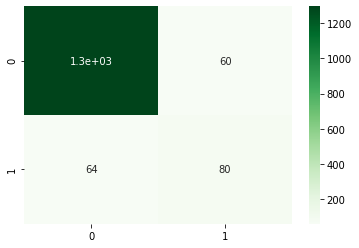

In [55]:
# Accuracy of our model
from sklearn import metrics
print("Accuracy Score :",metrics.accuracy_score(y_test,predict_gnb))
#precision score
print("Precision Score:",metrics.precision_score(y_test,predict_gnb))
#f1-score
print("f1-score:",metrics.f1_score(y_test,predict_gnb))
#recall score
print("recall-score:",metrics.recall_score(y_test,predict_gnb))
#roc score
print("roc_score:",metrics.roc_auc_score(y_test,predict_gnb))
#confusion maxtrix
print("confusion matrix :")
c_m = metrics.confusion_matrix(y_test, predict_gnb)
print(c_m)
sns.heatmap(c_m,annot=True,cmap='Greens')

**5.MultinomialNb**

In [56]:
from sklearn.naive_bayes import MultinomialNB  # Import MultinomialNB Classifier
M_nb= MultinomialNB()
# Training MultinomialNb Classifer
M_nb.fit(X_train,y_train)
G_nb.fit(X_train,y_train)
#Predict the response for test dataset
predict_mnb=M_nb.predict(X_test)

Accuracy Score : 0.9093333333333333
Precision Score: 0.5689655172413793
f1-score: 0.32673267326732675
recall-score: 0.22916666666666666
roc_score: 0.6053650442477876
confusion matrix :
[[1331   25]
 [ 111   33]]


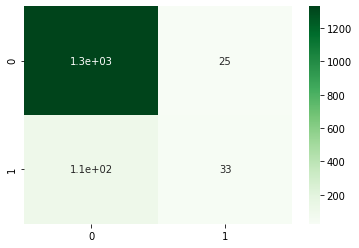

In [57]:
# Accuracy of our model
from sklearn import metrics
print("Accuracy Score :",metrics.accuracy_score(y_test,predict_mnb))
#precision score
print("Precision Score:",metrics.precision_score(y_test,predict_mnb))
#f1-score
print("f1-score:",metrics.f1_score(y_test,predict_mnb))
#recall score
print("recall-score:",metrics.recall_score(y_test,predict_mnb))
#roc score
print("roc_score:",metrics.roc_auc_score(y_test,predict_mnb))
#confusion maxtrix
print("confusion matrix :")
c_m = metrics.confusion_matrix(y_test, predict_mnb)
print(c_m)
sns.heatmap(c_m,annot=True,cmap='Greens')

KNN: 0.955800 (0.013174)
CART: 0.985200 (0.006337)
NB: 0.910400 (0.017682)
RF: 0.987800 (0.006630)
MNB: 0.904200 (0.015721)


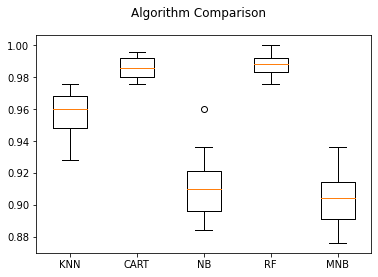

In [58]:
from sklearn import model_selection
models=[]
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('MNB',MultinomialNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=20)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


**observations:** by observing above graph comparision RandomForest classification algorithm have high prediction rate(98.2%) for our model.

**Step 9:Give a business understanding of your model**



> **Conclusion :**



* The aim of our  project to create a machine 
learning model to predict wheather a person can recieve a personal loan from a bank or not.

* To achieve this we created a model which created a accuray of 98% correct perdiction .
* For this we anlayse each data of a person we     performed some data analysis to  remove uneccessary data in our data sample like ID(its is some random variable),Experience(it has high correlation with age), ZIP Code(its high unique values) columns. because that's why above data does have impact on person chance for geting personal loan.
* During univariate analysis we observed that CCAvg ,Income have high skewness so have to reduce it so we performed some tranformation (power tranformation) techniques on data to reduce skewness.
* we removed Mortgage column because it has dicontinuous values. 
* After that we build a basic logistic regression model with accuaracy of 94% and  we have applied remaining algorithms on our data   than we got an accuaracy of 98% with Randomforest classifier algorithm.
* We obsereved that confussion matrix is better metric for understanding of our lagorithm result.
* Finally, by observing above graph we concluded that **RANDOMFOREST** algorithm has high accuracy score.so we  choose that as our model.